# Comparing datasets

Datasets:
- iDesignRES / OpenEntrance - aggregated (denoted by o_\<something\>)
- pyPSA-Eur - non-aggregated. (denoted by p_\<something\>)

Goals:
- Check the difference of the energy mixes throughout the whole dataset.

Spain:
- What is the energy mix of Spain
- What power generating capacity does Spain have?
- What loads does Spain have?


Questions:
What is the difference between primary and secondary energy?

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

First, we want to **plot the energy mix in OpenEntrance:**

In [21]:
o = pd.read_csv('../networks/OpenEntrance/IAMC_annual_data.csv')

# Select just Region that contains Spain
o_ES = o[o['Region'].str.contains('Spain', case=False, na=False)]

# Show the unique values of the column 'Variable'
print(o_ES['Variable'].unique())


['Network|Electricity|Maximum Flow' 'Capacity|Electricity|Biomass|w/o CCS'
 'Capacity|Electricity|Coal|Hard coal|w/o CCS'
 'Capacity|Electricity|Coal|Lignite|w/o CCS'
 'Capacity|Electricity|Gas|CCGT|w/ CCS'
 'Capacity|Electricity|Gas|CCGT|w/o CCS'
 'Capacity|Electricity|Gas|OCGT|w/o CCS'
 'Capacity|Electricity|Hydro|Pumped Storage'
 'Capacity|Electricity|Hydro|Reservoir'
 'Capacity|Electricity|Hydro|Run of River' 'Capacity|Electricity|Nuclear'
 'Capacity|Electricity|Oil|w/o CCS' 'Capacity|Electricity|Solar|PV'
 'Capacity|Electricity|Wind|Onshore'
 'Capital Cost|Electricity|Biomass|w/ CCS'
 'Capital Cost|Electricity|Biomass|w/o CCS'
 'Capital Cost|Electricity|Coal|Hard coal|w/ CCS'
 'Capital Cost|Electricity|Coal|Hard coal|w/o CCS'
 'Capital Cost|Electricity|Coal|Lignite|w/o CCS'
 'Capital Cost|Electricity|Gas|CCGT|w/ CCS'
 'Capital Cost|Electricity|Gas|CCGT|w/o CCS'
 'Capital Cost|Electricity|Gas|OCGT|w/o CCS'
 'Capital Cost|Electricity|Geothermal'
 'Capital Cost|Electricity|Hydrogen|O

In [37]:
# Select just the rows that contain 'Capacity|Electricity' in the column 'Variable'
O_ES_Cap_El = o_ES[o_ES['Variable'].str.contains('Capacity\|Electricity', case=False, na=False)].copy()

# Remove Capacity|Electricity from the column 'Variable'
O_ES_Cap_El['Variable'] = O_ES_Cap_El['Variable'].str.replace('Capacity|Electricity|', '')
O_ES_Cap_El

# Drop First Three columns
O_ES_Cap_El = O_ES_Cap_El.drop(['Model', 'Scenario', 'Region'], axis=1)
O_ES_Cap_El.head()

,Variable,Unit,2030
227,Biomass|w/o CCS,MW,1747.280606
228,Coal|Hard coal|w/o CCS,MW,3946.899889
229,Coal|Lignite|w/o CCS,MW,360.000000
230,Gas|CCGT|w/ CCS,MW,448.838921
231,Gas|CCGT|w/o CCS,MW,21434.738832


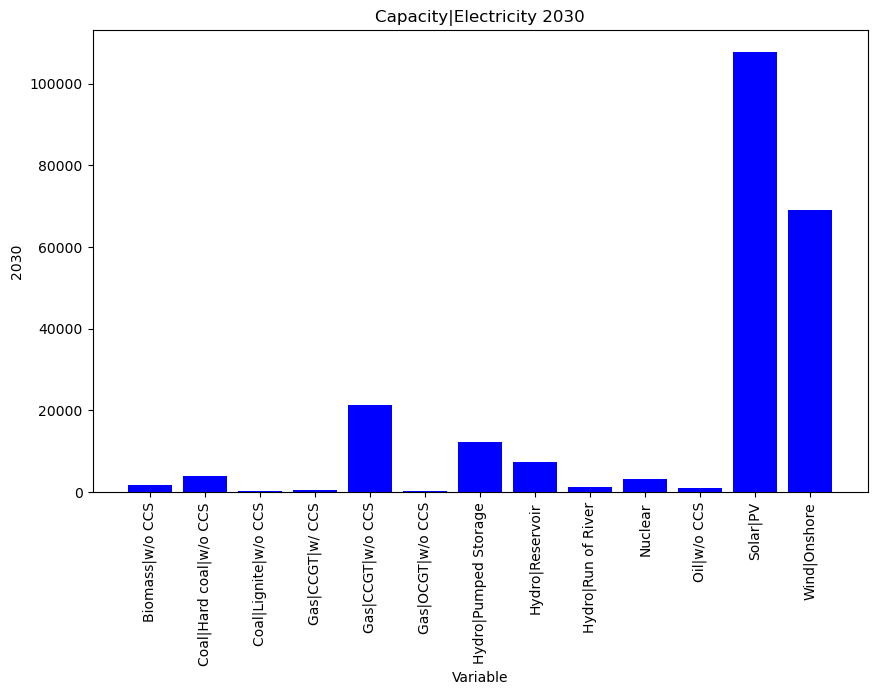

In [45]:
# Plot the 2030 Column in a stacked bar chart. X axis is the 'Variable' column and Y axis is the '2030' column. In matplotlib.
plt.figure(figsize=(10, 6))
plt.bar(O_ES_Cap_El['Variable'], O_ES_Cap_El['2030'], color='blue')
plt.xlabel('Variable')
plt.ylabel('2030')
plt.title('Capacity|Electricity 2030')
plt.xticks(rotation=90)
plt.show()

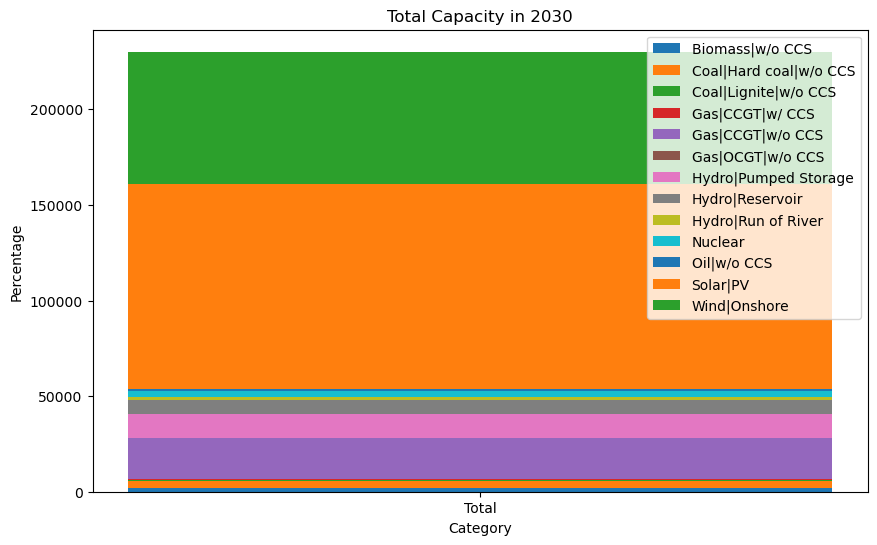

In [53]:
# Initialize the bottom for the first segment of the stacked bar
bottom = 0

# Create a figure and axis for the plot
plt.figure(figsize=(10, 6))

# Sort dataframe by Variable column, alphabetically
O_ES_Cap_El = O_ES_Cap_El.sort_values('Variable').copy()

# Plot each segment of the bar
for index, row in O_ES_Cap_El.iterrows():
    plt.bar('Total', row['2030'], bottom=bottom, label=row['Variable'])
    bottom += row['2030']

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Total Capacity in 2030')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# TODO: Make bar plot and legend the same order
# TODO: Compare barplot with data from pyPSA-Eur.